In [1]:
pip install pandas

In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras 
import tensorflow as tf
import seaborn
import warnings
warnings.filterwarnings("ignore")
from sklearn import preprocessing

In [8]:
ipl = pd.read_csv(r'C:\Users\RLDC\Desktop\Megala\Sample data\ipl_data.csv')
ipl.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [9]:
df=ipl.drop(['date','runs','wickets','overs','runs_last_5','wickets_last_5','mid','striker','non-striker'],axis=1)

In [10]:
df.head()

,venue,bat_team,bowl_team,batsman,bowler,total
0,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,222
1,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,222
2,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,222
3,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,222
4,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,222


In [11]:
X=df.drop(['total'],axis=1)
y=df['total']

In [12]:
X.head()

,venue,bat_team,bowl_team,batsman,bowler
0,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar
1,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar
2,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar
3,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar
4,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar


In [13]:
y.head()

0    222
1    222
2    222
3    222
4    222
Name: total, dtype: int64

In [14]:
from sklearn.preprocessing import LabelEncoder
venue_encoder=LabelEncoder()
batting_team_encoder=LabelEncoder()
bowling_team_encoder=LabelEncoder()
striker_encoder=LabelEncoder()
bowler_encoder=LabelEncoder()

In [15]:
X['venue']=venue_encoder.fit_transform(X['venue'])
X['bat_team']=batting_team_encoder.fit_transform(X['bat_team'])
X['bowl_team']=bowling_team_encoder.fit_transform(X['bowl_team'])
X['batsman']=striker_encoder.fit_transform(X['batsman'])
X['bowler']=bowler_encoder.fit_transform(X['bowler'])

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
scaler=MinMaxScaler()

In [20]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

In [21]:
model=keras.Sequential([
    keras.layers.Input( shape=(X_train_scaled.shape[1],)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(1, activation='linear')
])
huber_loss=tf.keras.losses.Huber(delta=1.0)
model.compile(optimizer='adam', loss=huber_loss)

In [22]:
model.fit(X_train_scaled,y_train, epochs=50, batch_size=64, validation_data=(X_test_scaled,y_test))

Epoch 1/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 55.8024 - val_loss: 22.2507
Epoch 2/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 22.3946 - val_loss: 22.2584
Epoch 3/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 22.3064 - val_loss: 21.9452
Epoch 4/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 22.1643 - val_loss: 21.9257
Epoch 5/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 22.0496 - val_loss: 22.3317
Epoch 6/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 22.1118 - val_loss: 21.8236
Epoch 7/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 22.1229 - val_loss: 21.8124
Epoch 8/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 22.0959 - val_loss: 21.7967
Epoch 9/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 22.1404 - val_loss: 21.7701
Epoch 10/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 22.0806 - val_loss: 22.2130
Epoch 11/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 22.1772 - val_loss: 21.8237
Epoch 12/50
832/832 ━━━━━━━━━━

<Axes: >

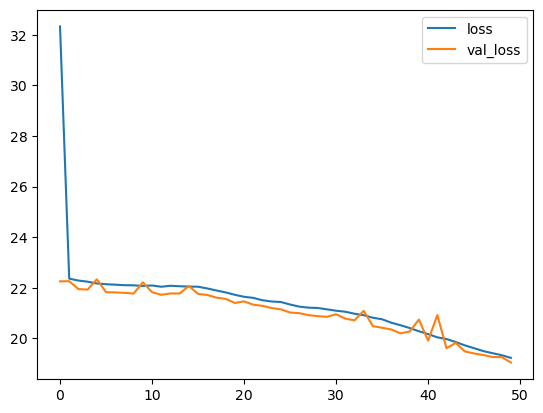

In [23]:
model_losses=pd.DataFrame(model.history.history)
model_losses.plot()

In [24]:
predictions=model.predict(X_test_scaled)

713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [25]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mean_absolute_error(y_test,predictions)

19.533365993922125

In [28]:
pip install ipywidgets

Note: you may need to restart the kernel to use updated packages.


In [29]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display, clear_output

venue=widgets.Dropdown(options=df['venue'].unique().tolist(),description="Select Venue:")
batting_team=widgets.Dropdown(options=df['bat_team'].unique().tolist(),description="Select Batting_team:")
bowling_team=widgets.Dropdown(options=df['bowl_team'].unique().tolist(),description="Select Bowling_team:")
striker=widgets.Dropdown(options=df['batsman'].unique().tolist(),description="Select Striker:")
bowler=widgets.Dropdown(options=df['bowler'].unique().tolist(),description="Select Bowler:")

predict_button=widgets.Button(description="Predict Score")

def predict_score(b):
    with output:
        clear_output()

        decoded_venue=venue_encoder.transform([venue.value])
        decoded_batting_team=batting_team_encoder.transform([batting_team.value])
        decoded_bowling_team=bowling_team_encoder.transform([bowling_team.value])
        decoded_striker=striker_encoder.transform([striker.value])
        decoded_bowler=bowler_encoder.transform([bowler.value])

        input=np.array([decoded_venue,decoded_batting_team,decoded_bowling_team,decoded_striker,decoded_bowler])
        input=input.reshape(1,5)
        input=scaler.transform(input)
        predicted_score=model.predict(input)
        predicted_score=int(predicted_score[0,0])
        print(predicted_score)

In [30]:
predict_button.on_click(predict_score)
output=widgets.Output()
display(venue,batting_team,bowling_team,striker,bowler,predict_button,output)

Dropdown(description='Select Venue:', options=('M Chinnaswamy Stadium', 'Punjab Cricket Association Stadium, M…

Dropdown(description='Select Batting_team:', options=('Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasth…

Dropdown(description='Select Bowling_team:', options=('Royal Challengers Bangalore', 'Kings XI Punjab', 'Delhi…

Dropdown(description='Select Striker:', options=('SC Ganguly', 'BB McCullum', 'RT Ponting', 'DJ Hussey', 'Moha…

Dropdown(description='Select Bowler:', options=('P Kumar', 'Z Khan', 'AA Noffke', 'JH Kallis', 'SB Joshi', 'CL…

Button(description='Predict Score', style=ButtonStyle())

Output()